## NeuralNetwork vs LogisticsRegression on a Classfication Problem




### Packages ##

Let's first import all the packages that you will need during this assignment.
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [sklearn](http://scikit-learn.org/stable/) provides simple and efficient tools for data mining and data analysis. 
- [matplotlib](http://matplotlib.org) is a library for plotting graphs in Python.
- planar_utils provides sigmoid and plot_decision_boundary functions

In [0]:
# Package imports
 !rm -rf NeuralNets
 !git clone "https://github.com/Msanjayds/NeuralNets"



import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
#%load "NeuralNets/planar_utils.py"
import sys 
sys.path.append('NeuralNets')
import planar_utils  
from planar_utils import plot_decision_boundary, sigmoid
%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent over iterations

Cloning into 'NeuralNets'...
remote: Enumerating objects: 16, done.
remote: Total 16 (delta 0), reused 0 (delta 0), pack-reused 16
Unpacking objects: 100% (16/16), done.


From sklearns datasets create a guassian quantiles dataset and load it into variables X and Y

In [0]:
def load_extra_datasets():  
    N = 200
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.7, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    return  gaussian_quantiles

HS [1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0
 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0
 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0
 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0
 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0
 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1]


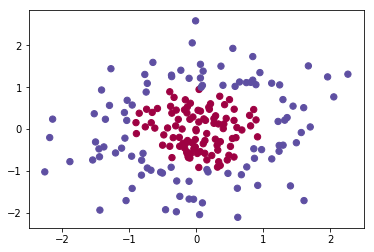

In [0]:

gaussian_quantiles= load_extra_datasets()
X, Y = gaussian_quantiles
X, Y = X.T, Y.reshape(1, Y.shape[0])
#print("VT",X[0,:],"tel",X[1,:])
print("HS",Y[0,:])
# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y[0,:], s=40, cmap=plt.cm.Spectral);

In [0]:
shape_X = X.shape
shape_Y = Y.shape

#print(shape_X[0,1])
#m=shape_X[0,1]+shape_Y[0,1]
print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
#print ('No of Examples %d!' % (m))

The shape of X is: (2, 200)
The shape of Y is: (1, 200)


## Simple Logistic Regression

Before building a full neural network, lets first see how logistic regression performs on this problem. You can use sklearn's built-in functions to do that. Run the code below to train a logistic regression classifier on the dataset.

In [0]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


You can now plot the decision boundary of these models. Run the code below.

A PATA [[0.50920057 0.45727739 0.4434956  0.42464776 0.51931627]]
DOMEL [[0.49079943 0.50920057]
 [0.54272261 0.45727739]
 [0.5565044  0.4434956 ]
 [0.57535224 0.42464776]
 [0.48068373 0.51931627]]
DOMEL bin [1 0 0 0 1]
error [[0. 0. 0. 0. 0.]]
[-0.01595924]
[[0.19035194 0.1785737 ]]
Accuracy of logistic regression: 55 % (percentage of correctly labelled datapoints)


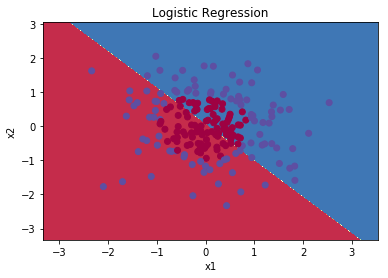

In [0]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y[0,:])
plt.title("Logistic Regression")
err=1/(1+np.exp(-clf.intercept_-np.dot(clf.coef_,X))) #paso de verificación de cálculo
errm=clf.predict_proba(X.T)
errt=err-errm[:,1] #verificación todo debe de dar cero
erro=clf.predict(X.T)
#hs=np.log(errt/(1-errt))

print("A PATA", err[:,0:5])
print("DOMEL", errm[0:5])
print("DOMEL bin", erro[0:5])
print("error",errt[:,0:5])
#print("error",hs[:,0:10])


wl=clf.coef_
inte=clf.intercept_
print(inte)
print(wl)
# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

**Interpretation**: The dataset is not linearly separable, so logistic regression doesn't perform well. Hopefully a neural network will do better. Let's try this now! 

### Now lets build a Neural Network model with one hidden layer


Beolow is the structure of the NN Model

    1. Define the neural network structure ( # of input units, # of hidden units, etc). 
    2. Initialize the model's parameters
    3. Loop:
        - Implement forward propagation
        - Compute loss
        - Implement backward propagation to get the gradients
        - Update parameters (gradient descent)
    4. Then merge them into one function we call `nn_model()`. 
    Once we built `nn_model()` and learnt the right parameters,we    can make predictions on new data.

### 4.1 - Defining the neural network structure ####
    - n_x: the size of the input layer
    - n_h: the size of the hidden layer
    - n_y: the size of the output layer

In [0]:
#layer_sizes

def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    n_x = X.shape[0] # size of input layer`
    n_h = 4
    n_y =Y.shape[0] # size of output layer
    return (n_x, n_h, n_y)

In [0]:
# initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
        
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros(shape=(n_y, 1))
    
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [0]:
#forward_propagation

def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2A = np.dot(W2,A1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [0]:
# Gcompute_cost

def compute_cost(A2, Y, parameters):
    """
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    
    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = - np.sum(logprobs) / m    
    
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
    
    return cost

In [0]:
# backward_propagation

def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters['W1']
    W2 = parameters['W2']
        
    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache['A1']
    A2 = cache['A2']
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 

    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [0]:
# update_parameters


def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']

    
    # Update rule for each parameter

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

###  Combine all the above into a  nn_model() funcction ####

In [0]:
# nn_model

def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [0]:
# predict

def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    A2, cache = forward_propagation(X,parameters)
    predictions = A2 > 0.5
    ### END CODE HERE ###
    
    return predictions

Now we can run the Model on the entire data with 1 hidden layer (4 neurons) and 3000 epochs.

Cost after iteration 0: 0.693144
Cost after iteration 1000: 0.102363
Cost after iteration 2000: 0.088148
Cost after iteration 3000: 0.086514
Cost after iteration 4000: 0.421426
Cost after iteration 5000: 0.068805
Cost after iteration 6000: 0.075678
Cost after iteration 7000: 0.073318
Cost after iteration 8000: 0.670570
Cost after iteration 9000: 0.078744
Cost after iteration 10000: 0.077904
Cost after iteration 11000: 0.062661


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in multiply


Cost after iteration 12000: 0.084124
Cost after iteration 13000: 0.073368
Cost after iteration 14000: 0.054887
Cost after iteration 15000: nan
{'W1': array([[ 3.54572459,  2.32499829],
       [-0.21764693, -4.12577506],
       [-3.87986075,  1.65122164],
       [ 0.02795255, -0.14967498]]), 'b1': array([[1.82569   ],
       [2.30668477],
       [2.35073805],
       [2.40803476]]), 'W2': array([[-16.33479115, -17.46960058, -17.26336228,   8.82658197]]), 'b2': array([[11.43367692]])}


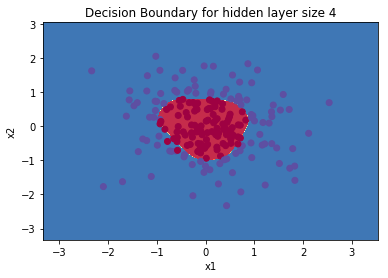

In [0]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations = 15500, print_cost=True)
print(parameters)
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y[0,:])
plt.title("Decision Boundary for hidden layer size " + str(4));

In [0]:
print(parameters)
A2,cache=forward_propagation(X,parameters)
#print(A2,"Cache",cache)
yp=1/(1+np.exp(-(np.dot(parameters["W2"],np.tanh(np.dot(parameters["W1"],X)+parameters["b1"]))+parameters["b2"])))
dif=yp-A2
print(dif)
print(yp.T)
#hs=np.tanh(np.dot(parameters["W1"],X)+parameters["b1"])


{'W1': array([[ 3.54572459,  2.32499829],
       [-0.21764693, -4.12577506],
       [-3.87986075,  1.65122164],
       [ 0.02795255, -0.14967498]]), 'b1': array([[1.82569   ],
       [2.30668477],
       [2.35073805],
       [2.40803476]]), 'W2': array([[-16.33479115, -17.46960058, -17.26336228,   8.82658197]]), 'b2': array([[11.43367692]])}
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]]
[[4.75018699e-10]
 [1.00000000e+00]


In [0]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 98%


Accuracy is much hihher compared to Logistic Regression. The model has learnt the patterns well. 
Unilike logistic regressino,Neural networks are able to learn even highly non-linear decision boundaries.

Now, let's try out several hidden layer sizes.

Accuracy for 1 hidden units: 68.5 %
Accuracy for 2 hidden units: 80.5 %
Accuracy for 3 hidden units: 98.0 %
Accuracy for 4 hidden units: 98.5 %
Accuracy for 5 hidden units: 68.5 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in multiply


Accuracy for 20 hidden units: 98.0 %
Accuracy for 50 hidden units: 97.5 %


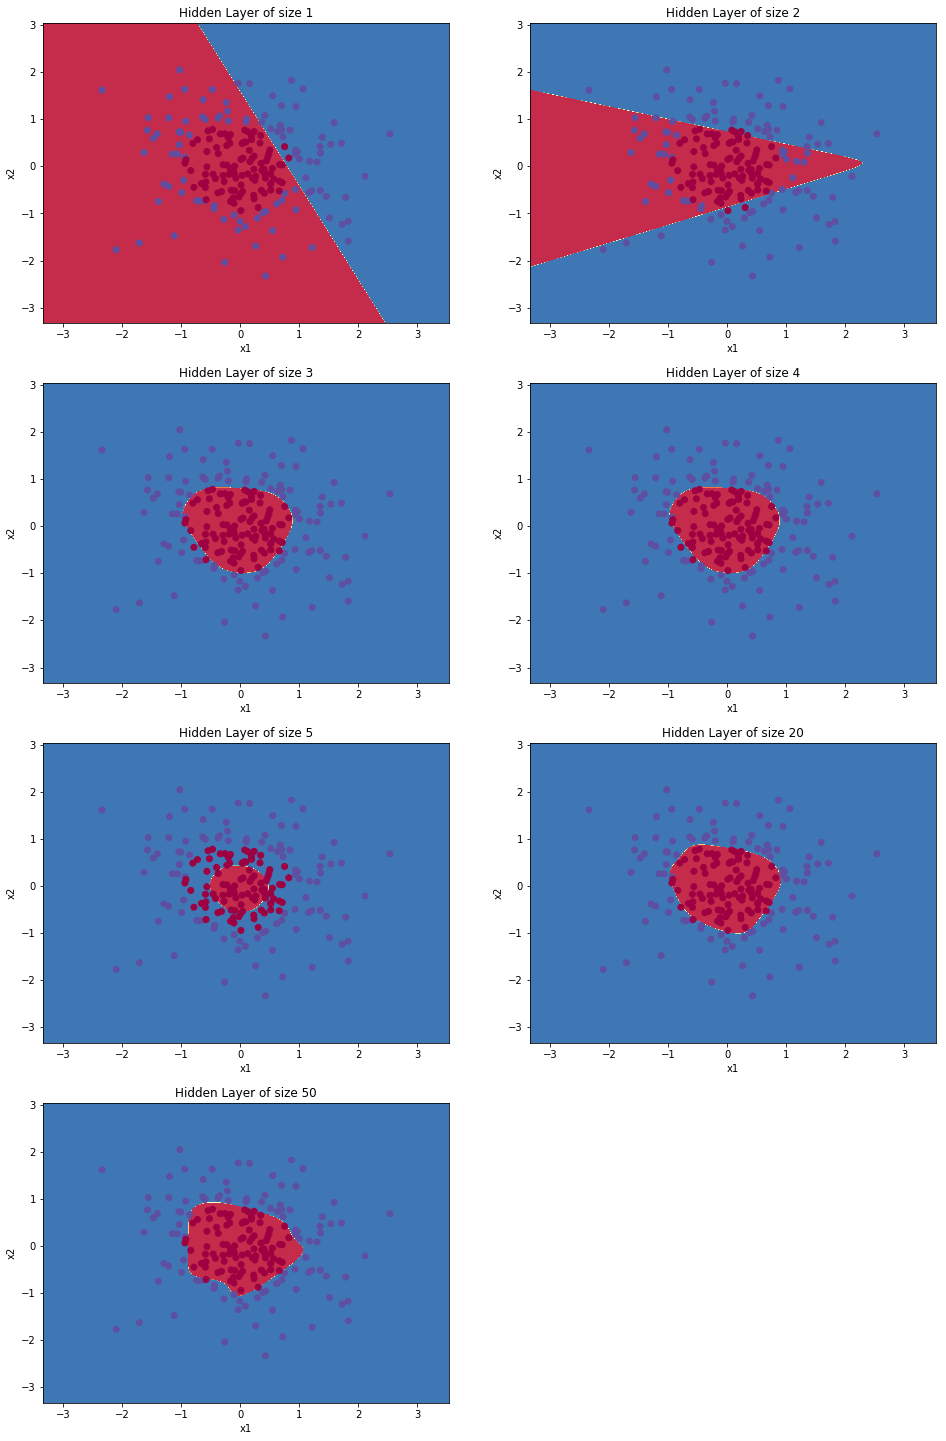

In [0]:
# Running the model with diffrent number of neurons in the hiddern layer

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y[0,:])
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

In [0]:
#Ejemplo con 1 capa
from sklearn.neural_network import MLPClassifier
y = Y[0,:]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(4), random_state=1, activation="tanh")
print(clf.fit(X.T, y)) 

print("weights between input and first hidden layer:")
print(clf.coefs_[0])
print("\nweights between first hidden and output layer:")
print(clf.coefs_[1])
print("Bias values for first hidden layer:")
print(clf.intercepts_[0])
print("\nBias values for outputd hidden layer:")
print(clf.intercepts_[1])

#print((y.T).shape, (X.T).shape)

MLPClassifier(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=4, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
weights between input and first hidden layer:
[[ 6.67036479 11.07321542 -5.98222766  1.60617103]
 [-4.23832927 -5.56424976 -9.90543808  2.40658524]]

weights between first hidden and output layer:
[[-11.67872068]
 [ 13.88687617]
 [-12.43832555]
 [-12.94031257]]
Bias values for first hidden layer:
[ 6.56019856 -9.90234857  7.74780249  1.7080873 ]

Bias values for outputd hidden layer:
[29.84826174]
(200,) (200,)
Accuracy: 97%
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 

In [0]:
#Ejemplo con 2 capas 
from sklearn.neural_network import MLPClassifier
y = Y[0,:]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(4,2), random_state=1, activation="tanh")
print(clf.fit(X.T, y)) 

print("weights between input and first hidden layer:")
print(clf.coefs_[0])
print("\nweights between first hidden and second hidden layer:")
print(clf.coefs_[1])
print("\nweights between second hidden and output layer:")
print(clf.coefs_[2])
print("Bias values for first hidden layer:")
print(clf.intercepts_[0])
print("Bias values for second hidden layer:")
print(clf.intercepts_[1])
print("\nBias values for outputd hidden layer:")
print(clf.intercepts_[2])

predskex = clf.predict(X.T)
print(predskex.shape, y.shape)
print ('Accuracy: %d' % float((np.dot(y.T,predskex) + np.dot(1-y.T,1-predskex))/float(y.size)*100) + '%')

prob_pred_skex = clf.predict_proba(X.T)
#print(prob_pred_skex)

#yp_skex=1/(1+np.exp(-(np.dot(np.tanh(np.dot(X.T,clf.coefs_[0])+clf.intercepts_[0]),clf.coefs_[1])+clf.intercepts_[1])))
yp_skex=sigmoid(np.dot(np.tanh(np.dot(np.tanh(np.dot(X.T,clf.coefs_[0])+clf.intercepts_[0]),clf.coefs_[1])+clf.intercepts_[1]),clf.coefs_[2])+clf.intercepts_[2])

#print(yp_skex.T)
#print(prob_pred_skex)
print(yp_skex.T-prob_pred_skex[:,1].T)
#print(yp_skex)
#print(Y.T)

MLPClassifier(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
weights between input and first hidden layer:
[[ 0.94457204  5.72986016 -1.80198421 -3.00961794]
 [-2.59778063 -4.40060672  0.43171334 -4.33374564]]

weights between first hidden and second hidden layer:
[[-11.45447047   3.92637191]
 [ -7.5369196   -2.13183307]
 [ -7.14868352   8.75932291]
 [ -2.48094087  -7.02515692]]

weights between second hidden and output layer:
[[-17.57587938]
 [ 10.34808658]]
Bias values for first hidden layer:
[-0.54515364 -7.91441713 -1.18543481  3.2735724 ]
Bias values for s

In [0]:
!pip show tensorflow
!pip install tensorflow==2.0.0-alpha0 

Name: tensorflow
Version: 2.0.0a0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: astor, six, tf-estimator-nightly, tb-nightly, grpcio, gast, protobuf, keras-preprocessing, google-pasta, numpy, wheel, absl-py, keras-applications, termcolor
Required-by: stable-baselines, magenta, fancyimpute


In [0]:
#Tensor Flow con una capa
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#import sklearn as sk
import tensorflow as tf
input_size = 2
hidden_layer_size=4
output_size = 1
#We build the model, necessary when using tensorflow

model = tf.keras.Sequential([

    tf.keras.layers.Dense(hidden_layer_size, activation='tanh'),
    #We create the second hidden layer the same way
    #tf.keras.layers.Dense(hiden_layer_size, activation='tanh'),
    #Output layer
    tf.keras.layers.Dense(output_size, activation='sigmoid') 
    #tf.keras.layers.Dense(output size) takes the inputs provided to the model and 
    #calculates the dot productof the inputsand he weights and add bias
])


model.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])
#model.compile(optimizer,loss) configures the model for training

#Which deta tensorflow has to fit?
#model.fit(inputs,targets) fits (trains) the model

model.fit(X.T, Y[0,:], epochs = 1500,   verbose = 2) # verbose = 0 is for not showing progress bar

print((X.T).shape, Y[0,:].shape)

Epoch 1/1500
200/200 - 0s - loss: 0.7699 - accuracy: 0.4850
Epoch 2/1500
200/200 - 0s - loss: 0.7696 - accuracy: 0.4850
Epoch 3/1500
200/200 - 0s - loss: 0.7693 - accuracy: 0.4850
Epoch 4/1500
200/200 - 0s - loss: 0.7689 - accuracy: 0.4850
Epoch 5/1500
200/200 - 0s - loss: 0.7685 - accuracy: 0.4850
Epoch 6/1500
200/200 - 0s - loss: 0.7682 - accuracy: 0.4850
Epoch 7/1500
200/200 - 0s - loss: 0.7679 - accuracy: 0.4850
Epoch 8/1500
200/200 - 0s - loss: 0.7676 - accuracy: 0.4850
Epoch 9/1500
200/200 - 0s - loss: 0.7672 - accuracy: 0.4850
Epoch 10/1500
200/200 - 0s - loss: 0.7669 - accuracy: 0.4850
Epoch 11/1500
200/200 - 0s - loss: 0.7666 - accuracy: 0.4850
Epoch 12/1500
200/200 - 0s - loss: 0.7662 - accuracy: 0.4850
Epoch 13/1500
200/200 - 0s - loss: 0.7659 - accuracy: 0.4850
Epoch 14/1500
200/200 - 0s - loss: 0.7656 - accuracy: 0.4850
Epoch 15/1500
200/200 - 0s - loss: 0.7652 - accuracy: 0.4850
Epoch 16/1500
200/200 - 0s - loss: 0.7649 - accuracy: 0.4850
Epoch 17/1500
200/200 - 0s - loss

In [0]:
print(model.layers[0].get_weights())
print(model.layers[0].get_weights()[0])
print(model.layers[1].get_weights())

#ysfpp=model.predict_proba(X.T)
ysfp=model.predict(X.T)
ysfpp=model.predict_proba(X.T)

yp_sfex=sigmoid(np.dot(np.tanh(np.dot(X.T,model.layers[0].get_weights()[0])+model.layers[0].get_weights()[1]),model.layers[1].get_weights()[0])+model.layers[1].get_weights()[1])

#W1sf=model.layers[0].get_weights()[0]
#print(W1sf, W1sf.shape)
#print(np.dot(X.T,model.layers[0].get_weights()[0])+model.layers[1].get_weights()[0].T)
#print(yp_skex.T)
#print(prob_pred_skex)
print(yp_sfex[0:10].T, "preditcion", ysfp[0:10].T)
print(yp_sfex.T-ysfp.T)
#print(prob_pred_skex[:,1])
#print(yp_sfex,ysfp)

#print(ysfp-yp_sfex)
#print(model.layers[2].get_weights())



[array([[-0.14820074,  0.7689483 ,  0.13982862,  1.0944935 ],
       [ 0.07944761, -0.18404986, -1.0408318 , -0.8297595 ]],
      dtype=float32), array([ 0.11188988,  0.30648667,  0.32805857, -0.5536309 ], dtype=float32)]
[[-0.14820074  0.7689483   0.13982862  1.0944935 ]
 [ 0.07944761 -0.18404986 -1.0408318  -0.8297595 ]]
[array([[ 0.47586048],
       [-0.73058844],
       [-0.77767414],
       [ 1.1234525 ]], dtype=float32), array([0.42644596], dtype=float32)]
[[0.41769491 0.72538905 0.4772646  0.34147992 0.50268127 0.6792909
  0.46832315 0.44372616 0.48597136 0.32983206]] preditcion [[0.41769493 0.725389   0.4772646  0.3414799  0.50268126 0.6792909
  0.4683231  0.44372615 0.48597142 0.32983208]]
[[-2.06164071e-08  4.43674660e-08 -1.27108236e-08  2.46518388e-08
   1.90445318e-08  1.23035473e-08  3.61441886e-08  7.97165434e-09
  -5.95492505e-08 -1.90096309e-08 -1.01377780e-08 -3.82297868e-08
  -4.34657044e-09 -1.58855343e-08 -3.06519574e-08 -2.68302662e-08
   1.29321520e-09 -2.0169202

In [0]:
#Tensor Flow con dos capas ocultas
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#import sklearn as sk
#import tensorflow as tf
input_size = 2
hidden_layer_size=4
hidden_layer_size2=3
output_size = 1
#We build the model, necessary when using tensorflow

model = tf.keras.Sequential([

    tf.keras.layers.Dense(hidden_layer_size, activation='tanh'),
        tf.keras.layers.Dense(hidden_layer_size2, activation='tanh'),
    #We create the second hidden layer the same way
    #tf.keras.layers.Dense(hiden_layer_size, activation='tanh'),
    #Output layer
    tf.keras.layers.Dense(output_size, activation='sigmoid') 
    #tf.keras.layers.Dense(output size) takes the inputs provided to the model and 
    #calculates the dot productof the inputsand he weights and add bias
])


model.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])
#model.compile(optimizer,loss) configures the model for training

#Which deta tensorflow has to fit?
#model.fit(inputs,targets) fits (trains) the model

model.fit(X.T, Y[0,:], epochs = 1500,   verbose = 2) # verbose = 0 is for not showing progress bar

print((X.T).shape, Y[0,:].shape)

Epoch 1/1500
200/200 - 0s - loss: 0.6903 - accuracy: 0.5800
Epoch 2/1500
200/200 - 0s - loss: 0.6903 - accuracy: 0.5850
Epoch 3/1500
200/200 - 0s - loss: 0.6903 - accuracy: 0.5800
Epoch 4/1500
200/200 - 0s - loss: 0.6903 - accuracy: 0.5900
Epoch 5/1500
200/200 - 0s - loss: 0.6903 - accuracy: 0.5900
Epoch 6/1500
200/200 - 0s - loss: 0.6903 - accuracy: 0.5900
Epoch 7/1500
200/200 - 0s - loss: 0.6903 - accuracy: 0.5900
Epoch 8/1500
200/200 - 0s - loss: 0.6903 - accuracy: 0.5900
Epoch 9/1500
200/200 - 0s - loss: 0.6903 - accuracy: 0.5900
Epoch 10/1500
200/200 - 0s - loss: 0.6902 - accuracy: 0.5900
Epoch 11/1500
200/200 - 0s - loss: 0.6902 - accuracy: 0.5900
Epoch 12/1500
200/200 - 0s - loss: 0.6902 - accuracy: 0.5900
Epoch 13/1500
200/200 - 0s - loss: 0.6902 - accuracy: 0.5900
Epoch 14/1500
200/200 - 0s - loss: 0.6902 - accuracy: 0.5900
Epoch 15/1500
200/200 - 0s - loss: 0.6902 - accuracy: 0.5900
Epoch 16/1500
200/200 - 0s - loss: 0.6902 - accuracy: 0.5900
Epoch 17/1500
200/200 - 0s - loss

In [0]:
print(model.layers[0].get_weights())
print(model.layers[0].get_weights()[0])
print(model.layers[1].get_weights())

#ysfpp=model.predict_proba(X.T)
ysfp=model.predict(X.T)
ysfpp=model.predict_proba(X.T)

#yp_sfex=sigmoid(np.dot(np.tanh(np.dot(X.T,model.layers[0].get_weights()[0])+model.layers[0].get_weights()[1]),model.layers[1].get_weights()[0])+model.layers[1].get_weights()[1])
yp_sfex=sigmoid(np.dot(np.tanh(np.dot(np.tanh(np.dot(X.T,model.layers[0].get_weights()[0])+model.layers[0].get_weights()[1]),model.layers[1].get_weights()[0])+model.layers[1].get_weights()[1]),model.layers[2].get_weights()[0])+model.layers[2].get_weights()[1])

#W1sf=model.layers[0].get_weights()[0]
#print(W1sf, W1sf.shape)
#print(np.dot(X.T,model.layers[0].get_weights()[0])+model.layers[1].get_weights()[0].T)
#print(yp_skex.T)
#print(prob_pred_skex)
print(yp_sfex[0:10].T, "preditcion", ysfp[0:10].T)
print(yp_sfex.T-ysfp.T)
#print(prob_pred_skex[:,1])
#print(yp_sfex,ysfp)

#print(ysfp-yp_sfex)
#print(model.layers[2].get_weights())


[array([[ 0.6595703 , -0.80524987,  0.02779921, -0.2307772 ],
       [-0.7238381 ,  0.28592938, -0.5450604 , -0.5023853 ]],
      dtype=float32), array([0.05745744, 0.0089635 , 0.14957643, 0.12859029], dtype=float32)]
[[ 0.6595703  -0.80524987  0.02779921 -0.2307772 ]
 [-0.7238381   0.28592938 -0.5450604  -0.5023853 ]]
[array([[-0.62403715,  0.46478796, -0.49329394],
       [ 0.29388875,  0.6903785 , -0.04936305],
       [-0.7141414 ,  0.08824483, -0.11414761],
       [-0.35794562, -0.7599443 ,  0.53662336]], dtype=float32), array([-0.21244861,  0.01165588,  0.03418916], dtype=float32)]
[[0.4698029  0.5308418  0.4471246  0.43145091 0.47776764 0.55070215
  0.54820436 0.52119826 0.47490449 0.42505874]] preditcion [[0.4698029  0.53084177 0.44712463 0.4314509  0.47776762 0.55070215
  0.54820436 0.5211983  0.4749045  0.42505872]]
[[ 1.00526459e-08  3.27465817e-08 -2.76996273e-08  4.51319143e-09
   2.70859138e-08 -3.39941908e-09 -6.04554706e-09 -1.44731452e-08
  -2.08617323e-08  1.48729303e-

In [0]:
!jupyter-kernelspec list

!jupyter qtconsole --kernel=ir
!jupyter console --kernel=ir

Available kernels:
  ir         /usr/local/share/jupyter/kernels/ir
  python2    /usr/local/share/jupyter/kernels/python2
  python3    /usr/local/share/jupyter/kernels/python3
  swift      /usr/local/share/jupyter/kernels/swift
Traceback (most recent call last):
  File "/usr/local/bin/jupyter-qtconsole", line 6, in <module>
    from qtconsole.qtconsoleapp import main
  File "/usr/local/lib/python2.7/dist-packages/qtconsole/qtconsoleapp.py", line 60, in <module>
    from qtconsole.qt import QtCore, QtGui
  File "/usr/local/lib/python2.7/dist-packages/qtconsole/qt.py", line 23, in <module>
    QtCore, QtGui, QtSvg, QT_API = load_qt(api_opts)
  File "/usr/local/lib/python2.7/dist-packages/qtconsole/qt_loaders.py", line 387, in load_qt
    api_options))
ImportError: 
    Could not load requested Qt binding. Please ensure that
    PyQt4 >= 4.7, PyQt5, PySide >= 1.0.3 or PySide2 is available,
    and only one is imported per session.

    Currently-imported Qt library:   None
    PyQt4 insta

KeyboardInterrupt: ignored

**Interpretation**:
- The larger models (with more hidden units) are able to fit the training set better, until eventually the largest models overfit the data. 
- The best hidden layer size seems to be around n_h = 3. Indeed, a value around here seems to  fits the data well without also incurring noticable overfitting.
- We can see that at n_h = 50 the model seems overfitting. 